Omar AbuRumman

In [17]:
import pandas as pd
import numpy as np
import statistics
from sklearn import linear_model


In [18]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
#Import code from airbnb eda analysis notebook
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)
airbnb_data.fillna({'last_review':0}, inplace = True)
airbnb_data['name'].fillna('None Available', inplace = True)
airbnb_data['host_name'].fillna('Unidentifiable', inplace=True)

In [19]:
print(airbnb_data.columns)
airbnb_data.head(7)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [20]:
#Transform categorical variables to numerical values
#Variables such as neighborhood, neighborhood group, room type
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Drop variables that have nothing to do with our model or analysis, text strings such as reviews or names
airbnb_data.drop(['id', 'name', 'host_name', 'host_id', 'last_review', 'reviews_per_month'], axis=1,inplace = True)
airbnb_data.columns


Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
le = preprocessing.LabelEncoder()
le.fit(airbnb_data['neighbourhood'])
airbnb_data['neighbourhood']=le.transform(airbnb_data['neighbourhood'])

le.fit(airbnb_data['neighbourhood_group'])
airbnb_data['neighbourhood_group']=le.transform(airbnb_data['neighbourhood_group'])

le.fit(airbnb_data['room_type'])
airbnb_data['room_type']=le.transform(airbnb_data['room_type'])

airbnb_data.describe()
airbnb_data.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,1,0
5,2,137,40.74767,-73.97500,0,200,3,74,1,129
6,1,13,40.68688,-73.95596,1,60,45,49,1,0
7,2,95,40.76489,-73.98493,1,79,2,430,1,220
8,2,202,40.80178,-73.96723,1,79,2,118,1,0
9,2,35,40.71344,-73.99037,0,150,1,160,4,188


In [22]:
#Linear Model first of all
lm = LinearRegression()
X = airbnb_data[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = airbnb_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lm.fit(X_train,y_train)

LinearRegression()

76.0276146715066
RMSE is 231.7758341513249
R squared is: 0.09698211510219878


Text(0, 0.5, 'Actual')

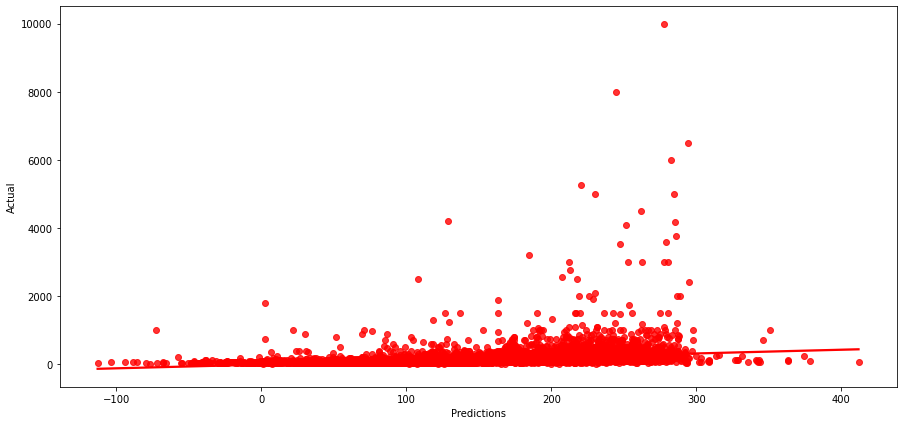

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

prediction = lm.predict(X_test)
print(mean_absolute_error(y_test,prediction))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared is:', r2_score(y_test, prediction))

plt.figure(figsize=(15,7))
sns.regplot(prediction,y_test, color = 'r')
plt.xlabel('Predictions')
plt.ylabel('Actual')

#Very large outliers that model itself cannot predict, around 8 listings that are above $4000. Outrageous prices for any airbnb listing

In [28]:
from sklearn.cluster import KMeans, SpectralClustering
rmsear = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(airbnb_data)
    rmsear.append(kmeanModel.inertia_)

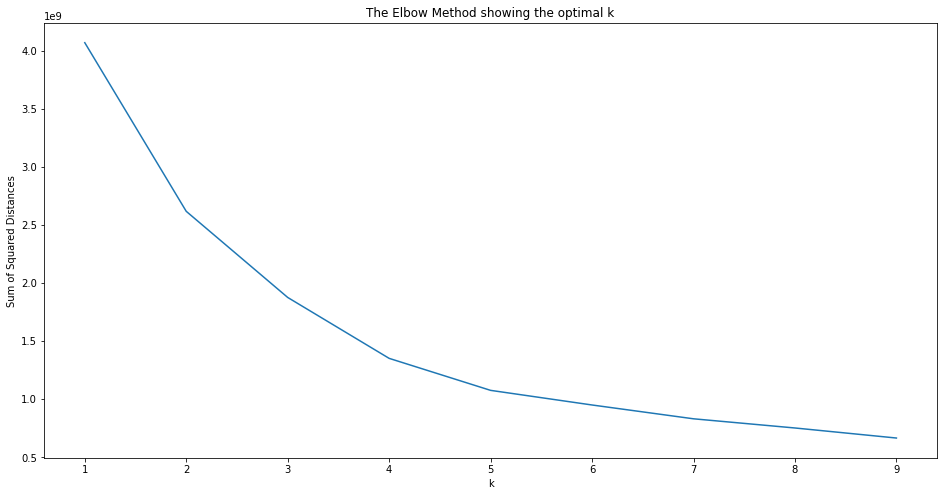

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K, rmsear)
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Cant conclude from this weather k=4 or k=5 would be optimal for k-mean clustering algorithm.

In [40]:
from sklearn import tree
from sklearn.metrics import accuracy_score

model_tree = tree.DecisionTreeClassifier()
m = model_tree.fit(X_train, y_train)
y_predict = model_tree.predict(X_test)

y_predict

array([ 66, 110, 210, ..., 150,  60,  65], dtype=int64)